In [259]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
df = pd.read_csv('dataR2.csv')

In [261]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [262]:
# verificando dados faltantes

df.isna().value_counts()

Age    BMI    Glucose  Insulin  HOMA   Leptin  Adiponectin  Resistin  MCP.1  Classification
False  False  False    False    False  False   False        False     False  False             116
dtype: int64

### Procurando possiveis correlações

A principio se percebe atraves da correlação da variavel **Classification**, que a **Glucose** obteve o melhor resultado das correlações, pois ela possue o resultado mais proximo de 1.


In [264]:
df.corr()['Classification'].sort_values(ascending=False).head()

Classification    1.000000
Glucose           0.384315
HOMA              0.284012
Insulin           0.276804
Resistin          0.227310
Name: Classification, dtype: float64

Os pacientes estão classificados sem câncer (**1**) e com câncer (**2**). Será verificado se o nivel de **glugose** (a esquerda) está relacionado com a resistencia a insulina ou "**HOMA**" (a direita) dos pacientes que possuem câncer.

<AxesSubplot:xlabel='Classification', ylabel='HOMA'>

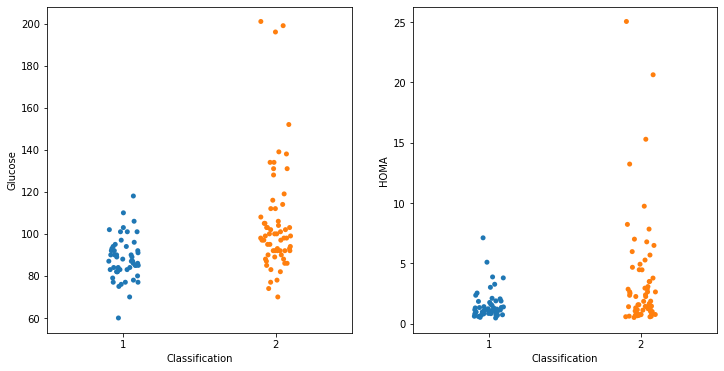

In [263]:
fig, axs = plt.subplots (1, 2, figsize=(12, 6))
sns.stripplot(x='Classification', y='Glucose', data=df, ax=axs[0])
sns.stripplot(x='Classification', y='HOMA', data=df, ax=axs[1])

Assim podemos obervar que a **Glucose** dos paciêntes com câncer (**2**) é maior do que as dos paciêntes que não possuem câncer (**1**), e que a **Glucose** tem um aumento ao passar dos anos em pacientes com câncer.

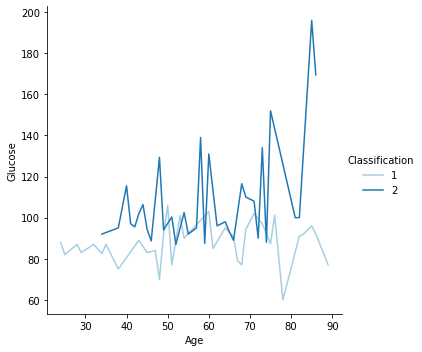

In [265]:
sns.relplot(x="Age", y="Glucose", ci=None, kind="line", hue="Classification", palette= "Paired", data=df)  

Observa-se também que o nivel de resistencia a insulina (**HOMA**) aumenta drasticamente em pacientes com mais de 80 anos.

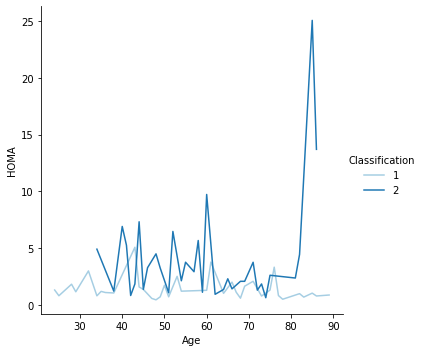

In [266]:
sns.relplot(x="Age", y="HOMA", ci=None, kind="line", hue="Classification", palette= "Paired", data=df) 

A principal função da insulina é controlar a quantidade de glicose no sangue após a alimentação<a href="https://www.abbottbrasil.com.br/corpnewsroom/diabetes-care/guia-basico-sobre-o-funcionamento-da-insulina-e-da-glicose-no-co.html#:~:text=A%20principal%20função%20da%20insulina,sanguínea%20pode%20ser%20altamente%20tóxica.">**¹**</a>. Com uma aumento na resistencia a insulina, o paciente pode desenvolver níveis elevados de glicose que atuam como fonte de combustível para alguns tipos de células cancerígenas, uma vez que a glicose se torna o principal substrato energético (efeito Warburg), o que pode contribuir com o aumento da proliferação de células malignas<a href="https://nutmed.com.br/blog/nutricao-clinica/desafios-do-tratamento-oncologico-no-contexto-de-diabetes-mellitus#:~:text=Hiperglicemia%3A%20Níveis%20elevados%20de%20glicose,da%20proliferação%20de%20células%20malignas.">**²**</a>.

Acredito que a observação dessas taxas podem servir de indicativos para uma investigação medica sobre um possivel diagnostico de câncer.

### Modelo de regressão logistica para predizer a variável **Classification** com **statsmodels.api**.

In [ ]:
# separando os dados
X = df.drop(['Classification'], axis = 1)
y = df.Classification

# tratando os dados
y[y == 2 ] = 0

# coeficiente do modelo de regressão logistica
mod = sm.Logit(y, X)
res = mod.fit()

In [269]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:         Classification   No. Observations:                  116
Model:                          Logit   Df Residuals:                      107
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.2826
Time:                        17:31:22   Log-Likelihood:                -57.236
converged:                       True   LL-Null:                       -79.783
Covariance Type:            nonrobust   LLR p-value:                 3.533e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age             0.0284      0.015      1.887      0.059      -0.001       0.058
BMI             0.1767      0.065      2.729      0.006       0.050       0.304
Glucose        -0.0582      0.021     -2.801    

### Modelo com **sklearn**.

In [270]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# metricas usadas para classificacao
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


In [271]:
df_log = df

X = df_log.drop(['Classification'], axis = 1)
y = df_log.Classification
X_std = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=10) # foi definido 30% como tamanho para o teste

logr = LogisticRegression(random_state=10)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

Matriz de confusão

In [272]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predito SEM cancer","Predito COM cancer",],
             index  =["Verdadeiro SEM cancer", "Verdadeiro COM cancer"])

,Predito SEM cancer,Predito COM cancer
Verdadeiro SEM cancer,16,3
Verdadeiro COM cancer,3,13


Metricas

In [273]:
print('acurácia: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('precisão: {:.4f}'.format(precision_score(y_test, y_pred)))
print('especificidade: {:.4f}'.format(13 / (13 + 3)))
print('sensitividade: {:.4f}'.format(16 / (16 + 3)))

acurácia: 0.8286
precisão: 0.8125
especificidade: 0.8125
sensitividade: 0.8421


Observando a matriz de confusão, o meu modelo que obteve mais erros foi o do **tipo II**, pois ele possui o menor resultado do valor **verdadeiro positivo** (representa os resultados previstos corretamente).